# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Symmetric-Positive-Definite-Matrices" data-toc-modified-id="Symmetric-Positive-Definite-Matrices-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Symmetric Positive Definite Matrices</a></div><div class="lev2 toc-item"><a href="#Energy-based-definition" data-toc-modified-id="Energy-based-definition-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Energy-based definition</a></div><div class="lev2 toc-item"><a href="#Gram-matrix-based-definition" data-toc-modified-id="Gram-matrix-based-definition-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Gram-matrix based definition</a></div><div class="lev2 toc-item"><a href="#Schur-complement-test-for-positive-definiteness" data-toc-modified-id="Schur-complement-test-for-positive-definiteness-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Schur complement test for positive definiteness</a></div><div class="lev2 toc-item"><a href="#Covariance-test-for-positive-definiteness-(optional)" data-toc-modified-id="Covariance-test-for-positive-definiteness-(optional)-14"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Covariance test for positive definiteness (optional)</a></div><div class="lev2 toc-item"><a href="#Cholesky-decomposition-(optional)" data-toc-modified-id="Cholesky-decomposition-(optional)-15"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Cholesky decomposition (optional)</a></div><div class="lev2 toc-item"><a href="#Positive-definite-matrices-and-minimization-problems" data-toc-modified-id="Positive-definite-matrices-and-minimization-problems-16"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Positive definite matrices and minimization problems</a></div><div class="lev2 toc-item"><a href="#The-ellipse-ax^2-+-2bxy-+-cy^2-=-1" data-toc-modified-id="The-ellipse-ax^2-+-2bxy-+-cy^2-=-1-17"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>The ellipse $ax^2 + 2bxy + cy^2 = 1$</a></div>

In [1]:
using Pkg
Pkg.activate(pwd())
Pkg.instantiate()
Pkg.status()

  Activating project at `~/Documents/github.com/ucla-biostat-216/2022fall/slides/11-pd`


Status `~/Documents/github.com/ucla-biostat-216/2022fall/slides/11-pd/Project.toml`
⌃ [91a5bcdd] Plots v1.35.5
  [f2b01f46] Roots v2.0.8
  [37e2e46d] LinearAlgebra
Info Packages marked with ⌃ have new versions available


In [2]:
using LinearAlgebra, Plots, Roots

# Symmetric Positive Definite Matrices

- In last lecture, we learnt every symmetric matrix $\mathbf{A}$ admits an eigen-decomposition
$$
\mathbf{A} = \mathbf{Q} \boldsymbol{\Lambda} \mathbf{Q}',
$$
where $\mathbf{Q}$ is orthogonal and $\boldsymbol{\Lambda} = \text{diag}(\lambda_1, \ldots, \lambda_n)$ has eigenvalues on its diagonal.

- A **positive definite matrix** is a symmetric matrix with all its eigenvalues positive. That is $\lambda_i > 0$ for all $i$. We use $\mathbf{A} \succ \mathbf{O}$ to indicate positive definiteness of $\mathbf{A}$.

    A **positive semidefinite matrix** is a symmetric matrix with all its eigenvalues nonnegative. That is $\lambda_i \ge 0$ for all $i$. We use $\mathbf{A} \succeq \mathbf{O}$ to indicate positive semidefiniteness of $\mathbf{A}$.

- Examples: 
    1. $\begin{pmatrix} 2 & 0 \\ 0 & 6 \end{pmatrix}$ is positive definite. Its eigenvalues are 2 and 6.
    2. $\mathbf{Q} \begin{pmatrix} 2 & 0 \\ 0 & 6 \end{pmatrix} \mathbf{Q}'$ is positive definite if $\mathbf{Q}' = \mathbf{Q}^{-1}$. Its eigenvalues are 2 and 6.  
    3. $\mathbf{C} \begin{pmatrix} 2 & 0 \\ 0 & 6 \end{pmatrix} \mathbf{C}'$ is positive definite if $\mathbf{C}$ is invertible. Easier to show using the energy-based definition (below).  
    4. $\begin{pmatrix} a & b \\ b & c \end{pmatrix}$ is positive definite when $a > 0$ and $ac > b^2$. Show by energy-based definition or Schur complement.    
    5. $\begin{pmatrix} 2 & 0 \\ 0 & 0 \end{pmatrix}$ is positive semidefinite. Its eigenvalues are 2 and 0.  
    6. A positive number is a 1x1 positive definite matrix. A non-negative number is a 1x1 positive semidefinite matrix. 
    
- Note in general $\det(\mathbf{A}) > 0$ does not imply that $\mathbf{A}$ is positive definite.     

## Energy-based definition

- A symmetric matrix $\mathbf{A}$ is positive definite if and only if the energy $\mathbf{x}' \mathbf{A} \mathbf{x} > 0$ for all $\mathbf{x} \ne \mathbf{0}$.

    A symmetric matrix $\mathbf{A}$ is positive semidefinite if and only if the energy $\mathbf{x}' \mathbf{A} \mathbf{x} \ge 0$ for all $\mathbf{x} \ne \mathbf{0}$.

    Proof of the "only if" part: $\mathbf{A} = \mathbf{Q} \boldsymbol{\Lambda} \mathbf{Q}' = \sum_{i=1}^n \lambda_i \mathbf{q}_i \mathbf{q}_i'$, where $\lambda_i > 0$ and $\mathbf{q}_i$ are orthonormal to each other. Then
$$
\mathbf{x}' \mathbf{A} \mathbf{x} = \mathbf{x}' \left( \sum_{i=1}^n \lambda_i \mathbf{q}_i \mathbf{q}_i' \right) \mathbf{x} = \sum_{i=1}^n \lambda_i (\mathbf{q}_i' \mathbf{x})^2
$$
Since $\mathbf{Q}$ is orthogonal, $\mathbf{Q}' \mathbf{x} \ne \mathbf{0}$ (otherwise it conflicts with linear indepence between $\mathbf{q}_i$s). Therefore $\mathbf{x}' \mathbf{A} \mathbf{x} = \sum_{i=1}^n \lambda_i (\mathbf{q}_i' \mathbf{x})^2 > 0$. 

    Proof of the "if" part: Take $\mathbf{x} = \mathbf{q}_i$. Then $\mathbf{x}' \mathbf{A} \mathbf{x} = \lambda_i > 0$.
    
- Suppose $\mathbf{C}$ is positive definite and $\mathbf{A}$ has independent columns. Then $\mathbf{A}' \mathbf{C} \mathbf{A}$ is positive definite. (HW6)

- If $\mathbf{A}_1$ and $\mathbf{A}_2$ are positive definite, then $\alpha_1 \mathbf{A}_1 + \alpha_2 \mathbf{A}_2$ is positive definite for any $\alpha_1, \alpha_2 > 0$.

    If $\mathbf{A}_1$ and $\mathbf{A}_2$ are positive semidefinite, then $\alpha_1 \mathbf{A}_1 + \alpha_2 \mathbf{A}_2$ is positive semidefinite for any $\alpha_1, \alpha_2 \ge 0$.

    Proof is trivial using the energy-based definition.

## Gram-matrix based definition

- A square matrix $\mathbf{A}$ is **positive semidefinite** if and only if $\mathbf{A} = \mathbf{B}' \mathbf{B}$ for some matrix $\mathbf{B}$.

    A square matrix $\mathbf{A}$ is **positive definite** if and only if $\mathbf{A} = \mathbf{B}' \mathbf{B}$ for some matrix $\mathbf{B}$ with independent columns.

    Proof of the "if" part: use the energy-based definition.  
    
    Proof of the "only if" part: take $\mathbf{B} = \boldsymbol{\Lambda}^{1/2} \mathbf{Q}'$.

## Schur complement test for positive definiteness

- Consider a matrix $\mathbf{X}$ partitioned as
$$
\mathbf{X} = \begin{pmatrix} \mathbf{A} & \mathbf{B} \\ \mathbf{B}' & \mathbf{C} \end{pmatrix},
$$
where the diagonal blocks $\mathbf{A}$ and $\mathbf{C}$ are symmetric. Then 
    1. $\mathbf{X} \succ \mathbf{O}$ if and only if $\mathbf{A} \succ \mathbf{O}$ and $\mathbf{S} = \mathbf{C} - \mathbf{B}' \mathbf{A}^{-1} \mathbf{B} \succ \mathbf{O}$.  
    2. If $\mathbf{A} \succ \mathbf{O}$, then $\mathbf{X} \succeq \mathbf{O}$ if $\mathbf{S} = \mathbf{C} - \mathbf{B}' \mathbf{A}^{-1} \mathbf{B} \succeq \mathbf{O}$.

- Note: the matrix $\mathbf{S} = \mathbf{C} - \mathbf{B}' \mathbf{A}^{-1} \mathbf{B}$ is called the **Schur complement** of the block $\mathbf{A}$ of $\mathbf{X}$.
    
- Example 4 above.    

## Covariance test for positive semidefiniteness (optional)

- This is a trick due to statistician [Igram Olkin (1985)](https://doi.org/10.2307/2322195).

- A matrix $\mathbf{A} \in \mathbb{R}^{n \times n}$ is positive semidefinite if and only if $\mathbf{A} = \text{Cov}(\mathbf{X})$ for a random vector $\mathbf{X} \in \mathbb{R}^n$.

    Proof of the "if" part: We use the energy-based definition:
$$
\mathbf{a}' \mathbf{A} \mathbf{a} = \mathbf{a}' \text{Cov}(\mathbf{X}) \mathbf{a} = \text{Var}(\mathbf{a}' \mathbf{X}) \ge 0
$$
for any vector $\mathbf{a}$.

    Proof of the "only if" part: Let $\mathbf{Y} \sim \text{Normal}(\mathbf{0}, \mathbf{I}_n)$. Then $\mathbf{A} = \text{Cov}(\mathbf{A}^{1/2} \mathbf{Y})$.

- Schur lemma: If $\mathbf{A}, \mathbf{B} \in \mathbb{R}^{n \times n}$ are positive semidefinite, then their Hadamard product (elementwise product) $\mathbf{A} \circ \mathbf{B} = (a_{ij} b_{ij})$ is positive semidefinite.

    Proof: Let $\mathbf{A} = \text{Cov}(\mathbf{X})$, $\mathbf{B} = \text{Cov}(\mathbf{Y})$, and $\mathbf{X}$ and $\mathbf{Y}$ are indepenent. Then $\mathbb{E}(x_i y_i x_j y_j) = (\mathbb{E} x_i x_j) (\mathbb{E}y_i y_j) = a_{ij} b_{ij}$. That is $\mathbf{A} \circ \mathbf{B} = \text{Cov}(\mathbf{X} \circ \mathbf{Y})$, which is positive semidefinite.

## Cholesky decomposition

- The Cholesky decomposition can be thought as a special LU decomposition for symmetric, positive definite matrix $\mathbf{A}$.

- Any positive definite matrix $\mathbf{A}$ admits the decomposition
$$
\mathbf{A} = \mathbf{L} \mathbf{L}',
$$
where $\mathbf{L}$ is a lower triangular matrix with positive diagonal entries.

    Proof (by induction):
If $n=1$, then $\ell = \sqrt{a}$. For $n>1$, the block equation
$$
\begin{eqnarray*}
\begin{pmatrix}
a_{11} & \mathbf{a}' \\ \mathbf{a} & \mathbf{A}_{22}
\end{pmatrix} =
\begin{pmatrix}
	\ell_{11} & \mathbf{0}_{n-1}' \\ \boldsymbol{\ell} & \mathbf{L}_{22}
\end{pmatrix}
\begin{pmatrix}
	\ell_{11} & \boldsymbol{\ell}' \\ \mathbf{0}_{n-1} & \mathbf{L}_{22}'
\end{pmatrix}
\end{eqnarray*}
$$
has solution
$$
\begin{eqnarray*}
	\ell_{11} &=& \sqrt{a_{11}} \\
	\boldsymbol{\ell} &=& \ell_{11}^{-1} \mathbf{a}	\\
	\mathbf{L}_{22} \mathbf{L}_{22}' &=& \mathbf{A}_{22}  - \boldsymbol{\ell} \boldsymbol{\ell}' = \mathbf{A}_{22}  - a_{11}^{-1} \mathbf{a} \mathbf{a}'.
\end{eqnarray*}
$$  
Now $a_{11}>0$ (why?), so $\ell_{11}$ and $\boldsymbol{\ell}$ are uniquely determined. $\mathbf{A}_{22} - a_{11}^{-1} \mathbf{a} \mathbf{a}'$ is positive definite because $\mathbf{A}$ is positive definite (why?). By the induction hypothesis, $\mathbf{L}_{22}$ exists and is unique.

- **Pivot test of positive definiteness.** A symmetric matrix $\mathbf{A}$ is positive definite if the Cholesky decomposition can be carried out without encountering zero pivot.

In [3]:
using LinearAlgebra

A = Float64.([4 12 -16; 12 37 -43; -16 -43 98])

3×3 Matrix{Float64}:
   4.0   12.0  -16.0
  12.0   37.0  -43.0
 -16.0  -43.0   98.0

In [4]:
# Cholesky without pivoting
Achol = cholesky(Symmetric(A))

Cholesky{Float64, Matrix{Float64}}
U factor:
3×3 UpperTriangular{Float64, Matrix{Float64}}:
 2.0  6.0  -8.0
  ⋅   1.0   5.0
  ⋅    ⋅    3.0

In [5]:
Achol.L

3×3 LowerTriangular{Float64, Matrix{Float64}}:
  2.0   ⋅    ⋅ 
  6.0  1.0   ⋅ 
 -8.0  5.0  3.0

In [6]:
# LU decomposition is different from Cholesky
lu(A)

LU{Float64, Matrix{Float64}, Vector{Int64}}
L factor:
3×3 Matrix{Float64}:
  1.0   0.0       0.0
 -0.75  1.0       0.0
 -0.25  0.263158  1.0
U factor:
3×3 Matrix{Float64}:
 -16.0  -43.0   98.0
   0.0    4.75  30.5
   0.0    0.0    0.473684

## Positive definite matrices and minimization problems

- For a twice differentiable, scalar function $f: \mathbb{R} \mapsto \mathbb{R}$, the test for a local minimum is:
$$
\frac{df(x)}{dx} = 0 \quad (\text{first derivative test})
$$
and
$$
\frac{d^2f(x)}{dx^2} > 0 \quad (\text{second derivative test}).
$$

In [7]:
x = Vector(-π:0.1:π)
f(x) = sin(x) + 0.25x
∇f(x) = cos(x) + 0.25
# two roots of the gradient = 0 equation
x1, x2 = -acos(-0.25), acos(-0.25)

(-1.8234765819369754, 1.8234765819369754)

In [8]:
∇²f(x) = -sin(x)
# x1 is local minimum (2nd derivative > 0), x2 is local maximum (2nd derivative < 0)
∇²f(x1), ∇²f(x2)

(0.9682458365518541, -0.9682458365518541)

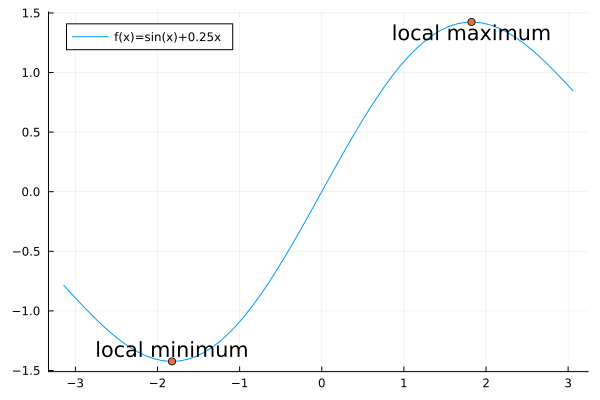

In [9]:
# draw the function
plt = plot(x, f.(x), label = "f(x)=sin(x)+0.25x", legend = :topleft)
plot(plt, [x1, x2], [f(x1), f(x2)], seriestype = :scatter, label = nothing)
annotate!([(x1, f(x1), ("local minimum", :bottom)), (x2, f(x2), ("local maximum", :top))])

- For a twice differentiable, multivariate function $f: \mathbb{R}^n \mapsto \mathbb{R}$, the test for a local minimum is:
$$
\nabla f(\mathbf{x}) = \begin{pmatrix} \frac{\partial f}{\partial x_1} \\ \vdots \\ \frac{\partial f}{\partial x_n} \end{pmatrix} = \mathbf{0} \quad (\text{first derivative test})
$$
and
$$
\nabla^2 f(\mathbf{x}) = \begin{pmatrix} \frac{\partial^2 f}{\partial x_1 \partial x_1} & \cdots & \frac{\partial^2 f}{\partial x_1 \partial x_n} \\
\vdots & \ddots & \vdots \\
\frac{\partial^2 f}{\partial x_n \partial x_1} & \cdots & \frac{\partial^2 f}{\partial x_n \partial x_n} \end{pmatrix} \succ \mathbf{O} \quad (\text{second derivative test}).
$$

## The ellipse $ax^2 + 2bxy + cy^2 = 1$

- Consider the 2-by-2 matrix
$$
\mathbf{A} = \begin{pmatrix} 5 & 4 \\ 4 & 5 \end{pmatrix}.
$$
We can test whether it is positive definite by 
    - eigenvalues: $\lambda_1 = 9$, $\lambda_2 = 1$, or  
    - energy test: 
$$
(x, y) \begin{pmatrix} 5 & 4 \\ 4 & 5 \end{pmatrix} \begin{pmatrix} x \\ y \end{pmatrix} = 5x^2 + 8xy + 5y^2 = 9 \left( \frac{x + y}{\sqrt 2} \right)^2 + 1 \left( \frac{x-y}{\sqrt 2} \right)^2 > 0,
$$ or
    - Schur complemennt: $a = 5 > 0$, $c - a^{-1} b^2 = 5 - 16/5 > 0$.
    
- Visualize $5x^2 + 8xy + 5y^2 = 1$. Axes align with eigenvectors and axe lengths are $1 / \sqrt \lambda$.

In [10]:
A = [5 4; 4 5]
f(x, y) = [x, y]' * A * [x, y]
x = -1:0.1:1
y = -1:0.1:1
plt = contour(x, y, f, levels=1:10, aspect_ratio = 1.0, xlim=[-1,1]);

In [11]:
Aeig = eigen(A)

Eigen{Float64, Float64, Matrix{Float64}, Vector{Float64}}
values:
2-element Vector{Float64}:
 1.0
 9.0
vectors:
2×2 Matrix{Float64}:
 -0.707107  0.707107
  0.707107  0.707107

In [12]:
evec1 = Aeig.vectors[:, 1] / sqrt(Aeig.values[1])

2-element Vector{Float64}:
 -0.7071067811865475
  0.7071067811865475

In [13]:
evec2 = Aeig.vectors[:, 2] / sqrt(Aeig.values[2])

2-element Vector{Float64}:
 0.2357022603955158
 0.2357022603955158

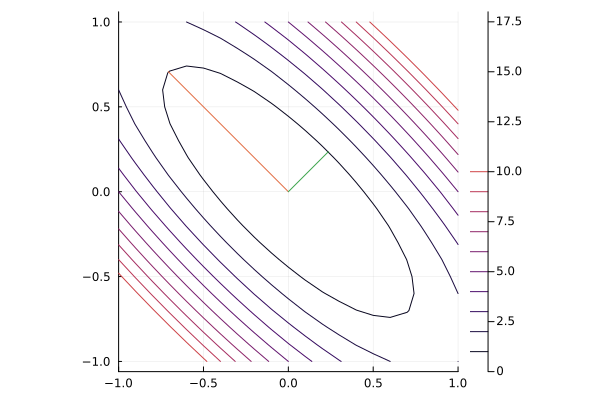

In [14]:
plot!(plt, [0, evec1[1]], [0, evec1[2]], label = nothing)
plot!(plt, [0, evec2[1]], [0, evec2[2]], label = nothing)

* If $\mathbf{A}$ is not positive definite, then the contours are not ellipsis. For example, 
$$
A = \begin{pmatrix} 4 & 5 \\ 5 & 4 \end{pmatrix}
$$
has eigenvalues -1 and 9. There is a saddle point at $(0, 0)^T$.

* Visualize $4x^2 + 8xy + 4y^2 = 1$. Axes align with eigenvectors and axe lengths are $1 / \sqrt{|\lambda|}$.

In [15]:
A = [4 5; 5 4]
f(x, y) = [x, y]' * A * [x, y]
x = -1:0.1:1
y = -1:0.1:1
plt = contour(x, y, f, levels=-10:10, aspect_ratio = 1.0, xlim=[-1,1]);

In [16]:
Aeig = eigen(A)

Eigen{Float64, Float64, Matrix{Float64}, Vector{Float64}}
values:
2-element Vector{Float64}:
 -1.0
  9.0
vectors:
2×2 Matrix{Float64}:
 -0.707107  0.707107
  0.707107  0.707107

In [17]:
evec1 = Aeig.vectors[:, 1] / sqrt(abs(Aeig.values[1]))

2-element Vector{Float64}:
 -0.7071067811865475
  0.7071067811865475

In [18]:
evec2 = Aeig.vectors[:, 2] / sqrt(abs(Aeig.values[2]))

2-element Vector{Float64}:
 0.2357022603955158
 0.2357022603955158

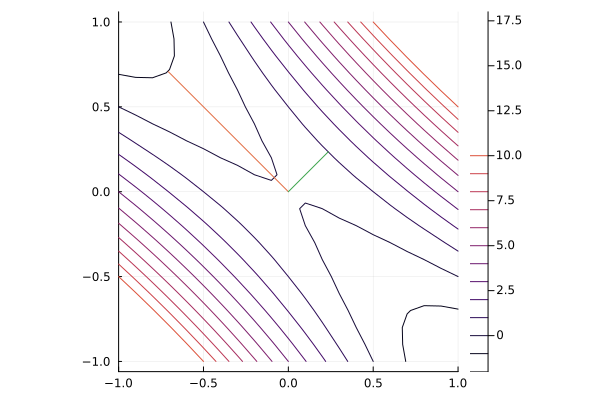

In [19]:
plot!(plt, [0, evec1[1]], [0, evec1[2]], label = nothing)
plot!(plt, [0, evec2[1]], [0, evec2[2]], label = nothing)
plot(plt)